In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from collections import Counter

from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced

import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
df=pd.read_csv("Data/train.csv")
df.drop(['policy_id','area_cluster'], axis=1,inplace=True)
df.head()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,segment,model,fuel_type,max_torque,max_power,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,0.515874,0.05,0.644231,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
1,0.672619,0.02,0.375000,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
2,0.841110,0.02,0.384615,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
3,0.900277,0.11,0.432692,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,0.596403,0.11,0.634615,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [3]:
na_summary=df.isna().sum()
na_summary

policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length                              0
width                               0
height      

In [4]:
# computing number of rows
rows = len(df.axes[0])
# computing number of columns
cols = len(df.axes[1])
print("Number of Rows: ", rows)
print("Number of Columns: ", cols)

Number of Rows:  58592
Number of Columns:  42


In [5]:
column_list = list(df.select_dtypes(include=['O']).columns)
column_list

['segment',
 'model',
 'fuel_type',
 'max_torque',
 'max_power',
 'engine_type',
 'is_esc',
 'is_adjustable_steering',
 'is_tpms',
 'is_parking_sensors',
 'is_parking_camera',
 'rear_brakes_type',
 'transmission_type',
 'steering_type',
 'is_front_fog_lights',
 'is_rear_window_wiper',
 'is_rear_window_washer',
 'is_rear_window_defogger',
 'is_brake_assist',
 'is_power_door_locks',
 'is_central_locking',
 'is_power_steering',
 'is_driver_seat_height_adjustable',
 'is_day_night_rear_view_mirror',
 'is_ecw',
 'is_speed_alert']

In [6]:
# labelEncoder present in scikitlearn library
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for x in column_list:
    df[x] = le.fit_transform(df[x])

In [7]:
df.head()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,segment,model,fuel_type,max_torque,max_power,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,0.515874,0.05,0.644231,4990,1,0,0,0,5,2,...,0,0,0,1,0,0,0,1,0,0
1,0.672619,0.02,0.375000,27003,1,0,0,0,5,2,...,0,0,0,1,0,0,0,1,0,0
2,0.841110,0.02,0.384615,4076,1,0,0,0,5,2,...,0,0,0,1,0,0,0,1,0,0
3,0.900277,0.11,0.432692,21622,1,3,3,2,0,6,...,1,1,1,1,1,1,1,1,2,0
4,0.596403,0.11,0.634615,34738,2,0,4,2,8,5,...,0,1,1,1,0,1,1,1,2,0


In [8]:
y=df['is_claim']
X=df.drop("is_claim",axis=1)

In [9]:
X.head()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,segment,model,fuel_type,max_torque,max_power,...,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating
0,0.515874,0.05,0.644231,4990,1,0,0,0,5,2,...,0,0,0,0,1,0,0,0,1,0
1,0.672619,0.02,0.375000,27003,1,0,0,0,5,2,...,0,0,0,0,1,0,0,0,1,0
2,0.841110,0.02,0.384615,4076,1,0,0,0,5,2,...,0,0,0,0,1,0,0,0,1,0
3,0.900277,0.11,0.432692,21622,1,3,3,2,0,6,...,1,1,1,1,1,1,1,1,1,2
4,0.596403,0.11,0.634615,34738,2,0,4,2,8,5,...,0,0,1,1,1,0,1,1,1,2


In [10]:
X.describe()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,segment,model,fuel_type,max_torque,max_power,...,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating
count,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,...,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000
mean,0.611246,0.069424,0.469420,18826.858667,1.763722,1.938644,4.659237,1.003448,3.288538,3.317057,...,0.350133,0.549171,0.724246,0.724246,0.979366,0.585251,0.380308,0.724246,0.993805,1.759950
std,0.414156,0.056721,0.122886,17660.174792,1.136988,1.566329,3.197355,0.835104,2.440212,2.566569,...,0.477016,0.497581,0.446897,0.446897,0.142158,0.492683,0.485467,0.446897,0.078467,1.389576
min,0.002735,0.000000,0.288462,290.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.210250,0.020000,0.365385,6112.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.573792,0.060000,0.451923,8794.000000,1.000000,2.000000,5.000000,1.000000,4.000000,2.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2.000000
75%,1.039104,0.110000,0.548077,27003.000000,3.000000,4.000000,7.000000,2.000000,5.000000,6.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000
max,1.396641,1.000000,1.000000,73430.000000,5.000000,5.000000,10.000000,2.000000,8.000000,8.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000


In [11]:
# Check the balance of our target values
y.value_counts()

0    54844
1     3748
Name: is_claim, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8,stratify=y)

In [13]:
print(f" Train : {Counter(y_train)}")
print(f" Test : {Counter(y_test)}")

 Train : Counter({0: 43875, 1: 2998})
 Test : Counter({0: 10969, 1: 750})


Text(0, 0.5, 'Testing Accuracy')

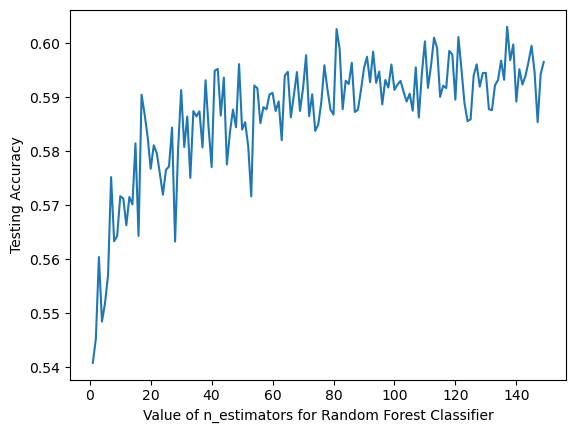

In [15]:
# Resample the training data with the BalancedRandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
scores =[]
for k in range(1, 150):
    rfc = BalancedRandomForestClassifier(n_estimators=k)
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    scores.append(balanced_accuracy_score(y_test, y_pred))

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(range(1, 150), scores)
plt.xlabel('Value of n_estimators for Random Forest Classifier')
plt.ylabel('Testing Accuracy')

In [16]:
max(scores)

0.6030420883094783

In [17]:
# Instantiate
balanced = BalancedRandomForestClassifier(n_estimators=112, random_state=0)
# Fit
balanced.fit(X_train, y_train)
y_pred = balanced.predict(X_test)
# Calculated the balanced accuracy score
balanced_accuracy_score(y_test, y_pred)

0.5840676451818763

In [18]:
# List the features sorted in descending order by feature importance
features_rank = sorted(zip(balanced.feature_importances_, X.columns), reverse=True)
for feature in features_rank:
    print(f"{feature[1]}: ({feature[0]})")

policy_tenure: (0.37174015295652346)
age_of_policyholder: (0.2549346895576213)
age_of_car: (0.19291577137625068)
population_density: (0.15614374360106278)
model: (0.002070321713358966)
length: (0.00181444711223255)
height: (0.0016691643664781272)
width: (0.001575342811821776)
engine_type: (0.001262501680528142)
displacement: (0.0012274754290008383)
gross_weight: (0.0011941809633845882)
ncap_rating: (0.0011828968068806661)
turning_radius: (0.0011192516665071057)
segment: (0.0011040371282477375)
max_power: (0.0010277728317658447)
max_torque: (0.0010214395820863907)
fuel_type: (0.0008035796477180536)
cylinder: (0.0004929944272407485)
make: (0.0004913409309284279)
is_power_door_locks: (0.00041972101102773945)
transmission_type: (0.00041037262139762205)
steering_type: (0.00037708942433336277)
is_ecw: (0.00037703470011253576)
is_adjustable_steering: (0.0003752383211613812)
is_central_locking: (0.0003712305746645962)
is_rear_window_defogger: (0.0003693770138599334)
is_parking_camera: (0.00036

In [ ]:
# Train the EasyEnsembleClassifier
from imblearn.ensemble import EasyEnsembleClassifier
ee_scores =[]
for k in range(10, 50):
    eec = EasyEnsembleClassifier(n_estimators=k)
    eec.fit(X_train, y_train)
    y_pred = eec.predict(X_test)
    scores.append(balanced_accuracy_score(y_test, y_pred))

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
#plt.plot(range(1, 150), ee_scores)
#plt.xlabel('Value of n_estimators for Easy Ensemble Classifier')
#plt.ylabel('Testing Accuracy')

In [30]:
max(ee_scores)

ValueError: max() arg is an empty sequence

In [21]:
# Instantiate
eec = EasyEnsembleClassifier(n_estimators=64)
# Fit
eec.fit(X_train, y_train)
y_pred_ee = eec.predict(X_test)
# Calculated the balanced accuracy score
balanced_accuracy_score(y_test, y_pred_ee)

0.5945296137599902

In [22]:
# Resample the training data with the RandomOversampler

from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=4)
# Resample the targets
X_resampled,y_resampled = ros.fit_resample(X_train,y_train)
Counter(y_resampled)

Counter({0: 43875, 1: 43875})

In [23]:
# Train the Logistic Regression model using the resampled data
from sklearn.linear_model import LogisticRegression
lreg = LogisticRegression(solver='lbfgs', random_state=1)
lreg.fit(X_resampled, y_resampled)
# Calculating predictions using the lreg model created above
y_pred = lreg.predict(X_test)
# Calculated the balanced accuracy score
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test, y_pred)

0.516878050262862

In [24]:
# Resample the training data with SMOTE
from imblearn.over_sampling import SMOTE

# Resample the model
X_S_resampled, y_S_resampled = SMOTE(random_state=1, sampling_strategy='auto').fit_resample(X_train, y_train)

Counter(y_S_resampled)

Counter({0: 43875, 1: 43875})

In [25]:
lreg.fit(X_S_resampled, y_S_resampled)
# Calculating predictions using the lreg model created above
y_pred = lreg.predict(X_test)
# Calculated the balanced accuracy score
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test, y_pred)

0.5074256541161455

In [26]:
# Resample the training data with SMOTEENN
# Warning: This is a large dataset, and this step may take some time to complete
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=1)
SMOTEENN_X_resampled, SMOTEENN_y_resampled = smote_enn.fit_resample(X_train, y_train)
Counter(SMOTEENN_y_resampled)

Counter({0: 26580, 1: 32573})

In [27]:
lreg.fit(SMOTEENN_X_resampled, SMOTEENN_y_resampled)
# Calculating predictions using the lreg model created above
y_pred = lreg.predict(X_test)
# Calculated the balanced accuracy score
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test, y_pred)

0.5113015467833592